In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#cargamos el dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns=['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo']
y = pd.DataFrame(iris.target)
y.columns = ["0:Setosa, 1:Versicolor, 2:Virginica"]

In [2]:
#estandarizar la data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_escalada = scaler.transform(X)
Xs = pd.DataFrame(X_escalada, columns=X.columns)

In [3]:
#aplicando el algoritmo
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm_y = gm.fit_predict(Xs)

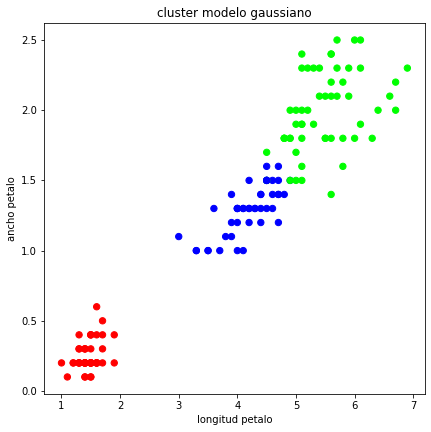

In [5]:
#grafica
plt.figure(figsize=(15,15))
colormap = np.array(['blue','red','lime'])
plt.subplot(2,2,3)
plt.scatter(X.longitud_petalo, X.ancho_petalo, c = colormap[gm_y], s=40)
plt.title('cluster modelo gaussiano')
plt.xlabel('longitud petalo')
plt.ylabel('ancho petalo')
plt.show()

In [6]:
#precicion del modelo
from sklearn.metrics import accuracy_score
from scipy.stats import mode
labels = np.zeros_like(gm_y)
for i in range(3):
  cat = (gm_y==i)
  labels[cat] = mode(iris.target[cat])[0]
acc = accuracy_score(iris.target, labels)
print('precision usando gm = ',acc)

precision usando gm =  0.9666666666666667
